In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import statistics 
from sklearn.linear_model import LinearRegression
import re

In [2]:
#creates X -- the array of reviews, and y -- the score associated to each review
df_reviews = pd.read_csv("reviews.csv")

X = np.array(df_reviews.drop(["reviewid", "author", "pub_year", "score"], axis = 1))
y = np.array(df_reviews["score"])


The r-squared value is 0.05275396992396075


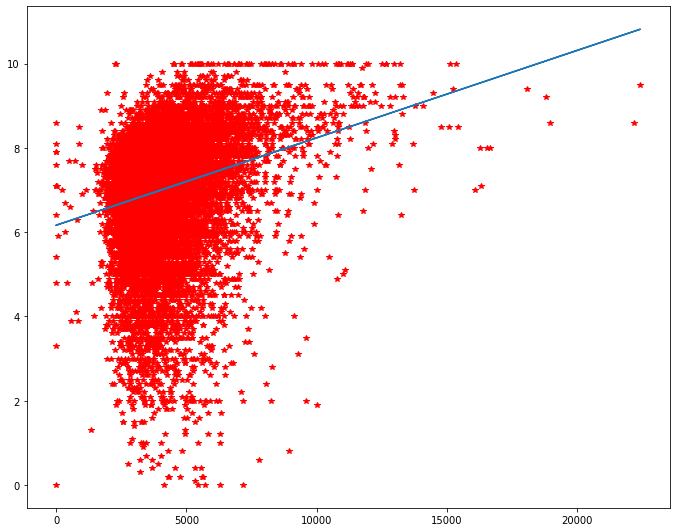

In [ ]:
#Determine whether there is a correlation between review length and the score given.

X_len = np.copy(X)

#cleans up empty slots and replaces a review by its length
for i in range(len(X_len)):
    if isinstance(X_len[i][0], float):
        X_len[i][0] = 0
    else:
        X_len[i][0] = len(X_len[i][0])

#performs and plots a linear regression
reg = LinearRegression().fit(X_len,y)

plt.rcParams["figure.figsize"] = [9.50, 7.50]
plt.rcParams["figure.autolayout"] = True
print("The r-squared value is", reg.score(X_len,y))

plt.plot(X_len, y, 'r*')
plt.plot(X_len, reg.coef_ * X_len + reg.intercept_, linestyle='solid')
plt.show()

In [ ]:
#binary search function, to be used in next cell for generating an alphabetized list of unique words 
#showing up in all reviews

def binary_search(arr, low, high, x):
 
    # Check base case
    if high >= low:
 
        mid = (high + low) // 2
 
        # If element is present at the middle itself
        if arr[mid] == x:
            return mid, True
 
        # If element is smaller than mid, then it can only
        # be present in left subarray
        elif arr[mid] > x:
            return binary_search(arr, low, mid - 1, x)
 
        # Else the element can only be present in right subarray
        else:
            return binary_search(arr, mid + 1, high, x)
 
    else:
        # Element is not present in the array
        return low, False

In [19]:
#Generates array of words and dictionary of word counts. Takes a couple minutes to run.

words = np.array(200000*[''], dtype=object)
wordcounts = {}
count = 0
for i in X:
    if isinstance(i[0], str):
        clean = re.sub(r"[,.;@#?!&$]+\ *", " ", i[0])
        review = clean.split()
        for j in review:
            if j.isalpha():
                j_lowercase = j.lower()
                if words[count - 1] < j_lowercase:
                    words[count] = j_lowercase
                    wordcounts[j_lowercase] = 1
                    count += 1
                else:
                    index, found = binary_search(words, 0, count, j_lowercase)
                    if found == True:
                        wordcounts[j_lowercase] += 1
                    else:
                        words[index+1:count+1] = words[index:count]
                        words[index] = j_lowercase
                        wordcounts[j_lowercase] = 1
                        count += 1

print(wordcounts)



{'eventually': 1631, 'became': 1409, 'a': 335772, 'punchline': 166, 'shorthand': 103, 'for': 86630, 'hotel': 402, 'lounge': 286, 'music': 32825, 'but': 84436, 'today': 1021, 'the': 638035, 'subgenre': 105, 'almost': 7758, 'feels': 6743, 'like': 62996, 'secret': 703, 'precedent': 163, 'listen': 3315, 'to': 248689, 'any': 11279, 'of': 362541, 'canonical': 93, 'albums': 7008, 'when': 24117, 'genre': 2465, 'was': 34434, 'starting': 918, 'chafe': 12, 'against': 3695, 'its': 37636, 'boundaries': 370, 'and': 344127, 'think': 4769, 'claustrophobic': 315, 'anxious': 304, 'century': 953, 'started': 1581, 'few': 10300, 'years': 11133, 'ahead': 671, 'schedule': 143, 'looked': 423, 'at': 43064, 'from': 58893, 'right': 5971, 'angle': 282, 'is': 127630, 'part': 6071, 'an': 53660, 'unbroken': 46, 'chain': 336, 'that': 137868, 'runs': 1110, 'abrasion': 71, 'ruminative': 133, 'fusion': 513, 'moment': 4068, 'best': 11954, 'it': 86079, 'has': 29107, 'aged': 216, 'far': 5856, 'more': 44599, 'gracefully': 2

In [29]:
#Produces a csv file of words appearing more than 1000 times.

common_words = {}
for i in wordcounts.keys():
    if wordcounts[i] > 1000:
        common_words[i] = wordcounts[i]

common_array = np.array([[i, common_words[i]] for i in common_words.keys()])

common_frame = pd.DataFrame(common_array)
common_frame.to_csv('common_pitchfork.csv',index=False)

In [3]:
#creates X -- the array of genres, and y -- the score associated to each review
df_genres = pd.read_csv("genres.csv")

X = np.array(df_genres.drop(["reviewid", "score"], axis = 1))
y = np.array(df_genres["score"])

#used in last cell
X_yrs = np.copy(X)

In [4]:
#gives the set of unique genres
genres = []
for i in range(X.shape[0]):
    if isinstance(X[i][1], str):
        genres.append(X[i][1])
unique_genres = set(genres)
print(unique_genres)

{'experimental', 'metal', 'pop/r&b', 'rap', 'jazz', 'electronic', 'global', 'folk/country', 'rock'}


global size: 219 , mean: 7.429680365296804 , stdev: 1.0060757573240175
folk/country size: 685 , mean: 7.2021897810218976 , stdev: 1.0644348329691724
experimental size: 1815 , mean: 7.336694214876033 , stdev: 1.1064549918554278
pop/r&b size: 1432 , mean: 6.883798882681564 , stdev: 1.295232383812657
jazz size: 435 , mean: 7.303908045977011 , stdev: 1.2511039883565462
metal size: 862 , mean: 6.95 , stdev: 1.387799417840329
rap size: 1559 , mean: 6.9005131494547784 , stdev: 1.3027027275356824
electronic size: 3874 , mean: 6.920702116675271 , stdev: 1.310055618783959
rock size: 9438 , mean: 6.942011019283747 , stdev: 1.360346582338916


[Text(-2.5, 0, ''),
 Text(0.0, 0, ''),
 Text(2.5, 0, ''),
 Text(5.0, 0, ''),
 Text(7.5, 0, ''),
 Text(10.0, 0, ''),
 Text(12.5, 0, '')]

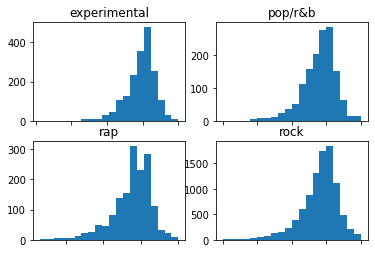

In [9]:
#creates a dictionary of scores associated to each genre
score_by_genre = {'global': [], 'folk/country': [], 'experimental': [], 'pop/r&b': [], 'jazz': [], 'metal': [], 'rap': [], 'electronic': [], 'rock': []}

X_genre = np.array([X[i][1] for i in range(X.shape[0]) if isinstance(X[i][1], str)])
y_genre = np.array([y[i] for i in range(len(y)) if isinstance(X[i][1], str)])

for i in range(len(X_genre)):
    score_by_genre[X_genre[i]].append(y_genre[i])

#average score and standard deviation for each genre
for i in score_by_genre.keys():
    print(i, "size:", len(score_by_genre[i]), ", mean:", statistics.mean(score_by_genre[i]), ", stdev:", statistics.stdev(score_by_genre[i]))

#plots distribution of scores for a few genres
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(score_by_genre['experimental'], bins=20)
axs[0, 0].set_title('experimental')
axs[0,0].set_xticklabels([])
axs[0, 1].hist(score_by_genre['pop/r&b'], bins=20)
axs[0, 1].set_title('pop/r&b')
axs[0,1].set_xticklabels([])
axs[1, 0].hist(score_by_genre['rap'], bins=20)
axs[1, 0].set_title('rap')
axs[1,0].set_xticklabels([])
axs[1, 1].hist(score_by_genre['rock'], bins=20)
axs[1, 1].set_title('rock')
axs[1,1].set_xticklabels([])

Rap appears to have scores concentrated around a slightly lower score than the other genres. Pop/r&b has significantly more scores near 6 than the other genres.

The r-squared value is 0.00019101892686312905


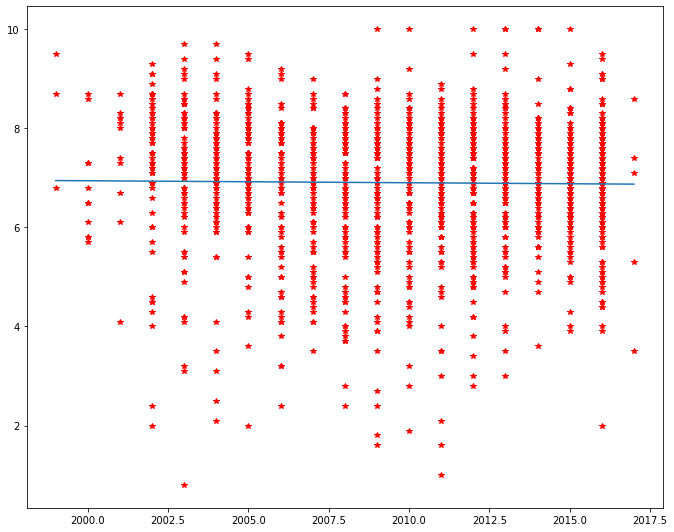

In [7]:
#X_yrs defined above for the genre analysis

#trend for rap reviews
X_rap = np.array([[i[0]] for i in X_yrs if i[1] == 'rap'])
y_rap = np.array([y[i] for i in range(X_yrs.shape[0]) if X_yrs[i][1] == 'rap'])

#performs and plots a linear regression
reg = LinearRegression().fit(X_rap,y_rap)

plt.rcParams["figure.figsize"] = [9.50, 7.50]
plt.rcParams["figure.autolayout"] = True
print("The r-squared value is", reg.score(X_rap,y_rap))

plt.plot(X_rap, y_rap, 'r*')
plt.plot(X_rap, reg.coef_ * X_rap + reg.intercept_, linestyle='solid')
plt.show()

